In [1]:
from pyspark.sql.types import *
from pyspark.sql import functions as F, Window as W
from grocery.jobs.make_store_clusters import MakeStoreClusters
from grocery.utils.config import get_config
from grocery.utils.io import init_spark

# Run Store Cluster Module

In [6]:
spark = init_spark()
cfg = get_config()
m = MakeStoreClusters(spark, cfg)
df = m.run_safe()

22-11-17 20:31:22: [INFO]: 40: **********  START PROCESS [MakeStoreClusters.run_safe] **********
22-11-17 20:31:22: [INFO]: 40: **********  START PROCESS [StandardizeFiles.run] **********
22-11-17 20:31:22: [INFO]: 40: **********  START PROCESS [StandardizeFiles.read_save_compress] **********
22-11-17 20:31:27: [INFO]: 58: Wrote file: /datalake/std/dh_transactions.parquet
22-11-17 20:31:27: [INFO]: 44: ********** FINISH PROCESS [StandardizeFiles.read_save_compress] **********
22-11-17 20:31:27: [INFO]: 44: ********** FINISH PROCESS [StandardizeFiles.run] **********
22-11-17 20:31:28: [INFO]: 40: **********  START PROCESS [MakeStoreClusters.run] **********
22-11-17 20:31:28: [INFO]: 40: **********  START PROCESS [MakeStoreClusters.make_store_agg] **********
22-11-17 20:31:28: [INFO]: 44: ********** FINISH PROCESS [MakeStoreClusters.make_store_agg] **********
22-11-17 20:31:28: [INFO]: 40: **********  START PROCESS [MakeStoreClusters.make_scaled_features] **********
22-11-17 20:31:30: [I

# Review Store Cluster Output

In [7]:
from grocery.utils.io import read_spark_data

# Check out store cluster data
store_clusters = read_spark_data(spark, **cfg['data']['curated']['store_cluster'])

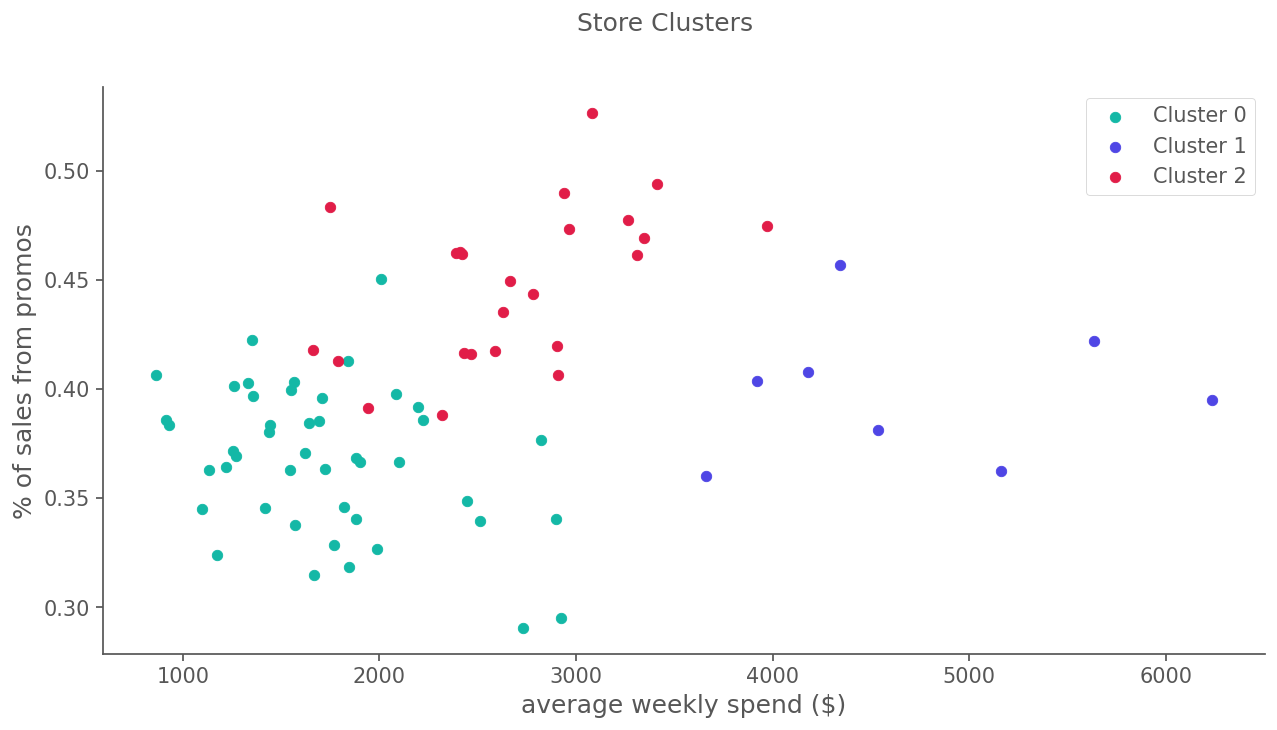

In [8]:
import matplotlib.pyplot as plt
plt.style.use('custom.mplstyle')

fig,ax = plt.subplots(figsize=(12,6))
colors = ['#14b8a6','#4f46e5','#e11d48']
for i,(label,data) in enumerate(store_clusters.toPandas().groupby('store_cluster')):
    ax.scatter(data['avg_weekly_spend'], data['pct_promo_sales'], c=colors[i], label=f"Cluster {label}")

fig.suptitle("Store Clusters")
ax.set_xlabel('average weekly spend ($)')
ax.set_ylabel('% of sales from promos')
ax.legend()